In [1]:
import pandas as pd
import geopandas as gpd
import numpy  as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
import seaborn as sbn
%matplotlib inline

In [2]:
SMdata = pd.read_csv("SMdata/Socio-mobility.csv", index_col=0)

In [3]:
SMdata.head()

,population,male,female,age_under_14,age_15_29,age_30_54,age_55_over,white,black,asian,...,unemployment_rate,percent_uninsured,mean_price_per_sqft,median_price_per_sqft,citibike_spatial,mobile-device_spatial,sr311_spatial,subway_spatial,taxi_spatial,twitter_spatial
tz,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,383102,0,0.0,95418,1546
2,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,6348,0,0.0,73,44
3,32450.0,15235.0,17215.0,16.351856,20.033410,34.419509,29.195225,31.959938,35.189522,8.311248,...,10.045116,8.402712,318.691787,315.104167,0,109300,700,225527.5,31960,480
4,27571.0,12546.0,15025.0,12.032675,24.910563,38.007785,25.048977,40.201661,13.778971,14.185195,...,9.031957,8.955406,NaN,NaN,31545,179644,399,0.0,178515,85
5,26482.0,13082.0,13400.0,18.400166,17.316894,36.133183,28.149757,89.064270,1.771014,6.532739,...,5.503406,3.673850,289.552591,276.162791,0,56271,490,0.0,3667,40


In [4]:
SMdata.rename(columns={'mobile-device_spatial':'mobile', 'citibike_spatial':'citibike','sr311_spatial':'sr311','subway_spatial':'subway','taxi_spatial':'taxi','twitter_spatial':'twitter'},inplace=True)

In [5]:
SMdata.head()

,population,male,female,age_under_14,age_15_29,age_30_54,age_55_over,white,black,asian,...,unemployment_rate,percent_uninsured,mean_price_per_sqft,median_price_per_sqft,citibike,mobile,sr311,subway,taxi,twitter
tz,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,383102,0,0.0,95418,1546
2,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,6348,0,0.0,73,44
3,32450.0,15235.0,17215.0,16.351856,20.033410,34.419509,29.195225,31.959938,35.189522,8.311248,...,10.045116,8.402712,318.691787,315.104167,0,109300,700,225527.5,31960,480
4,27571.0,12546.0,15025.0,12.032675,24.910563,38.007785,25.048977,40.201661,13.778971,14.185195,...,9.031957,8.955406,NaN,NaN,31545,179644,399,0.0,178515,85
5,26482.0,13082.0,13400.0,18.400166,17.316894,36.133183,28.149757,89.064270,1.771014,6.532739,...,5.503406,3.673850,289.552591,276.162791,0,56271,490,0.0,3667,40


In [6]:
LEHDW=pd.read_csv("SMdata/LEHD-work.csv",index_col=0)
LEHDR=pd.read_csv("SMdata/LEHD-resident.csv", index_col=0)

In [7]:
SMdata=SMdata[['population','mobile','citibike','sr311','subway','taxi','twitter']].merge(LEHDW[['total']].rename(columns={'total':'working'}), on=None, left_index=True, right_index=True, how='inner')

In [8]:
SMdata.head()

,population,mobile,citibike,sr311,subway,taxi,twitter,working
tz,,,,,,,,
3,32450.0,109300,0,700,225527.5,31960,480,4989
4,27571.0,179644,31545,399,0.0,178515,85,2717
5,26482.0,56271,0,490,0.0,3667,40,1191
6,15896.0,147674,0,255,0.0,7456,88,2495
7,77252.0,508255,0,1389,3336898.0,362180,2294,17223


In [9]:
SMdata=SMdata.merge(LEHDR[['total']].rename(columns={'total':'residential'}), on=None, left_index=True, right_index=True, how='inner')

In [10]:
SMdata.head()

,population,mobile,citibike,sr311,subway,taxi,twitter,working,residential
tz,,,,,,,,,
3,32450.0,109300,0,700,225527.5,31960,480,4989,11398
4,27571.0,179644,31545,399,0.0,178515,85,2717,12318
5,26482.0,56271,0,490,0.0,3667,40,1191,10751
6,15896.0,147674,0,255,0.0,7456,88,2495,6729
7,77252.0,508255,0,1389,3336898.0,362180,2294,17223,43048


In [11]:
#get pair-wise column correlation
SMdata.corr()

,population,mobile,citibike,sr311,subway,taxi,twitter,working,residential
population,1.000000,0.670248,-0.210465,0.877397,-0.042691,-0.059860,-0.028276,-0.099852,0.969425
mobile,0.670248,1.000000,-0.066319,0.607098,0.219016,0.144768,0.214191,0.175743,0.646672
citibike,-0.210465,-0.066319,1.000000,-0.183276,0.486907,0.748109,0.372861,0.513090,-0.102762
sr311,0.877397,0.607098,-0.183276,1.000000,-0.010677,-0.026607,0.066799,-0.049597,0.865145
subway,-0.042691,0.219016,0.486907,-0.010677,1.000000,0.630203,0.496341,0.703456,0.020381
taxi,-0.059860,0.144768,0.748109,-0.026607,0.630203,1.000000,0.556061,0.720043,0.053496
twitter,-0.028276,0.214191,0.372861,0.066799,0.496341,0.556061,1.000000,0.626458,0.017787
working,-0.099852,0.175743,0.513090,-0.049597,0.703456,0.720043,0.626458,1.000000,-0.040786
residential,0.969425,0.646672,-0.102762,0.865145,0.020381,0.053496,0.017787,-0.040786,1.000000


In [12]:
#auxiliary function to compute correlations between columns where both have data
def NZPopCorr(col1, col2):
    ind=(SMdata[col1]>0)&(SMdata[col2]>0)
    return np.corrcoef(SMdata[col1][ind], SMdata[col2][ind])[0][1]

In [13]:
#output a table with correlation between activities and population counts
PL=['population', 'residential', 'working']
ML=['taxi','subway','citibike','twitter','mobile','sr311']
pd.DataFrame([[NZPopCorr(M,P) for P in PL] for M in ML], columns=PL, index=ML)

,population,residential,working
taxi,-0.064720,0.049633,0.719559
subway,-0.232504,-0.141712,0.720643
citibike,-0.126996,0.011210,0.319030
twitter,-0.032551,0.017787,0.626458
mobile,0.676604,0.646672,0.175743
sr311,0.869460,0.863358,-0.056116


In [14]:
tzs= gpd.read_file('taxi_zones/taxi_zones.shp')

In [15]:
tzs.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.9183527103 192536.0856972019,..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"(POLYGON ((1033269.243591294 172126.0078125, 1..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.769506663 256767.6975403726,..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.4667968601 203714.0759887695,..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.3104932606 144283.335850656, ..."


In [16]:
SMdata.head()

,population,mobile,citibike,sr311,subway,taxi,twitter,working,residential
tz,,,,,,,,,
3,32450.0,109300,0,700,225527.5,31960,480,4989,11398
4,27571.0,179644,31545,399,0.0,178515,85,2717,12318
5,26482.0,56271,0,490,0.0,3667,40,1191,10751
6,15896.0,147674,0,255,0.0,7456,88,2495,6729
7,77252.0,508255,0,1389,3336898.0,362180,2294,17223,43048


In [17]:
tzs['Population']=tzs.LocationID.map(SMdata.population)
tzs['taxi']=tzs.LocationID.map(SMdata.taxi)
tzs['subway']=tzs.LocationID.map(SMdata.subway)
tzs['citibike']=tzs.LocationID.map(SMdata.citibike)
tzs['twitter']=tzs.LocationID.map(SMdata.twitter)
tzs['mobile']=tzs.LocationID.map(SMdata.mobile)
tzs['sr311']=tzs.LocationID.map(SMdata.sr311)

In [18]:
tzs

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,Population,taxi,subway,citibike,twitter,mobile,sr311
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.9183527103 192536.0856972019,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"(POLYGON ((1033269.243591294 172126.0078125, 1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.769506663 256767.6975403726,...",32450.0,31960.0,225527.5,0.0,480.0,109300.0,700.0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.4667968601 203714.0759887695,...",27571.0,178515.0,0.0,31545.0,85.0,179644.0,399.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.3104932606 144283.335850656, ...",26482.0,3667.0,0.0,0.0,40.0,56271.0,490.0
5,6,0.150491,0.000606,Arrochar/Fort Wadsworth,6,Staten Island,"POLYGON ((966568.7466657609 158679.854687795, ...",15896.0,7456.0,0.0,0.0,88.0,147674.0,255.0
6,7,0.107417,0.000390,Astoria,7,Queens,"POLYGON ((1010804.217962816 218919.6406951398,...",77252.0,362180.0,3336898.0,0.0,2294.0,508255.0,1389.0
7,8,0.027591,0.000027,Astoria Park,8,Queens,"POLYGON ((1005482.276373357 221686.4661663175,...",0.0,2900.0,0.0,0.0,124.0,25315.0,6.0
8,9,0.099784,0.000338,Auburndale,9,Queens,"POLYGON ((1043803.993348822 216615.9250395149,...",20609.0,16753.0,0.0,0.0,123.0,159111.0,377.0
9,10,0.099839,0.000436,Baisley Park,10,Queens,"POLYGON ((1044355.071716622 190734.3208969831,...",39079.0,52272.0,0.0,0.0,267.0,321007.0,863.0


In [19]:
tzs.dropna(inplace=True)

C:\Users\ps336\Anaconda3\lib\site-packages\geopandas\plotting.py:389: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


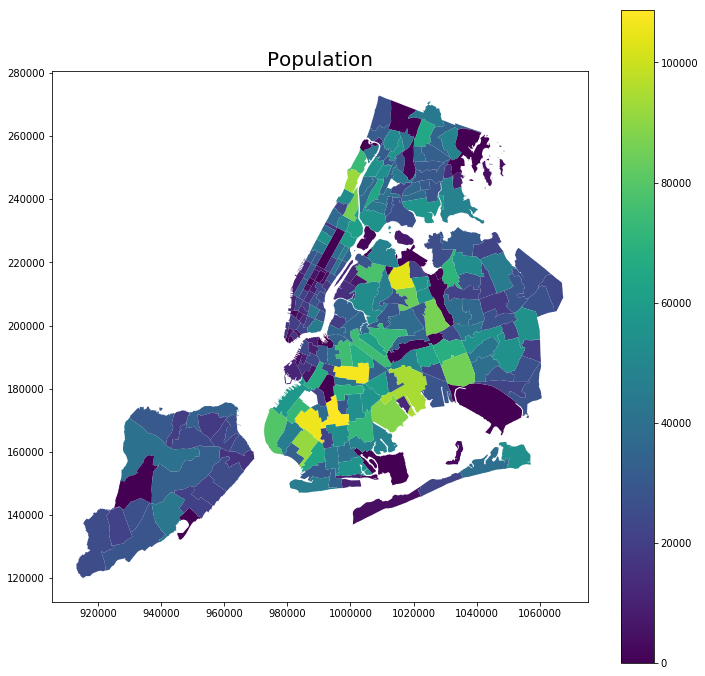

In [20]:
#heatMap for Population
f, ax = plt.subplots(1, figsize=(12,12))
ax.set_title("Population", fontsize=20)
tzs.plot(axes=ax, column='Population', legend=True)

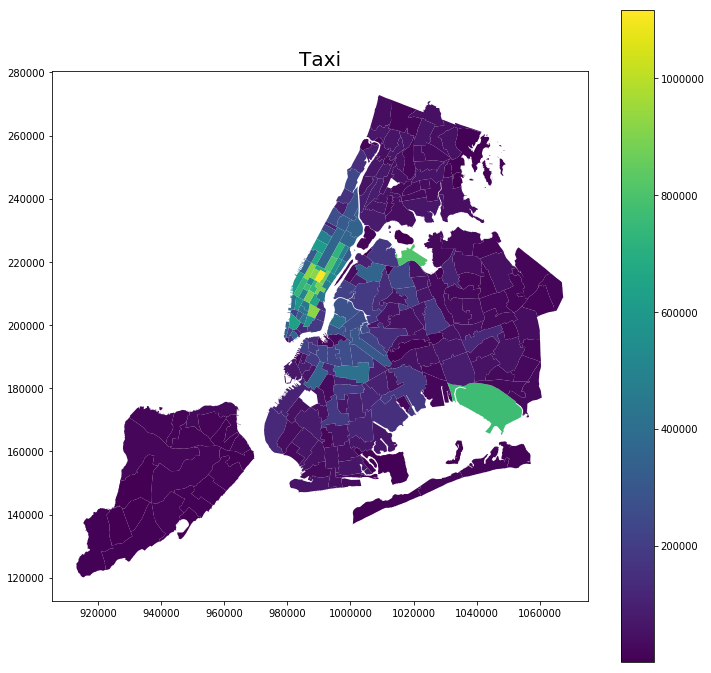

In [21]:
#heatMap for taxi
f, ax = plt.subplots(1, figsize=(12,12))
ax.set_title("Taxi", fontsize=20)
tzs.plot(axes=ax, column='taxi', legend=True)

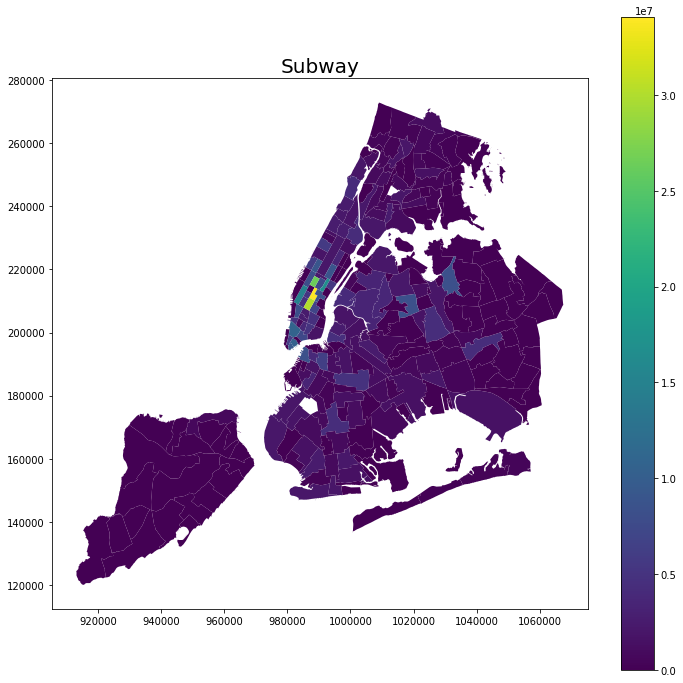

In [22]:
#heatMap for Subway
f, ax = plt.subplots(1, figsize=(12,12))
ax.set_title("Subway", fontsize=20)
tzs.plot(axes=ax, column='subway', legend=True)

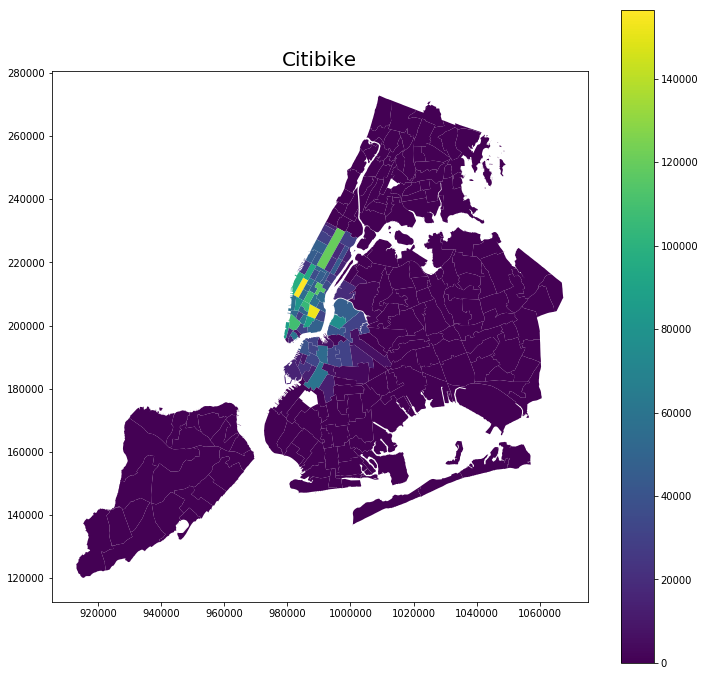

In [23]:
#heatMap for citibike
f, ax = plt.subplots(1, figsize=(12,12))
ax.set_title("Citibike", fontsize=20)
tzs.plot(axes=ax, column='citibike', legend=True)

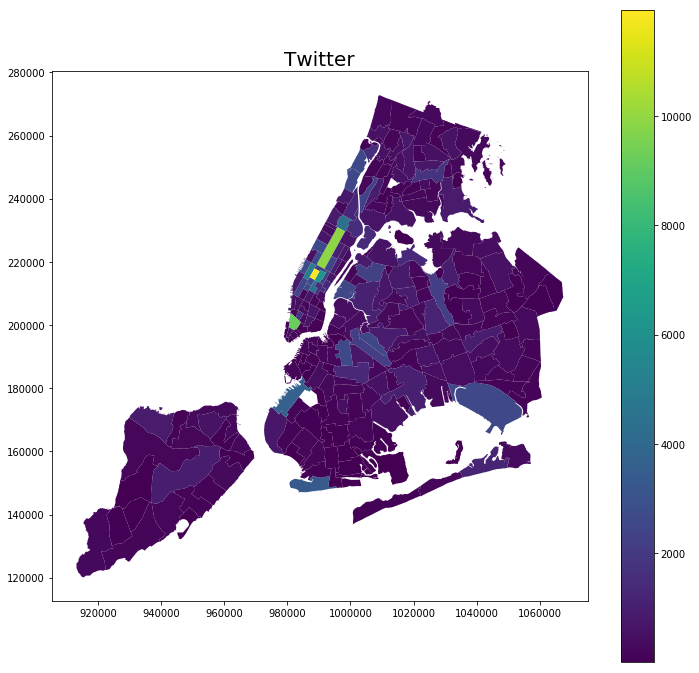

In [24]:
#heatMap for twitter
f, ax = plt.subplots(1, figsize=(12,12))
ax.set_title("Twitter", fontsize=20)
tzs.plot(axes=ax, column='twitter', legend=True)

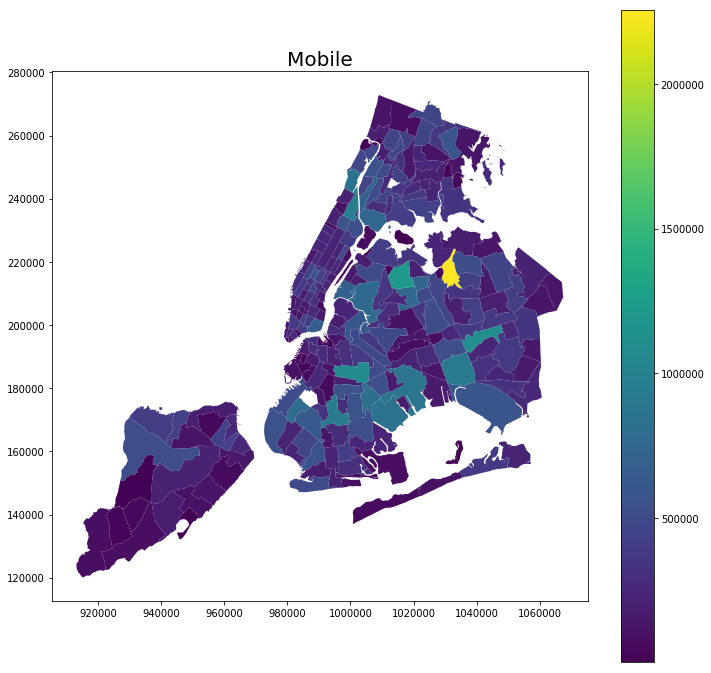

In [25]:
#heatMap for mobile
f, ax = plt.subplots(1, figsize=(12,12))
ax.set_title("Mobile", fontsize=20)
tzs.plot(axes=ax, column='mobile', legend=True)

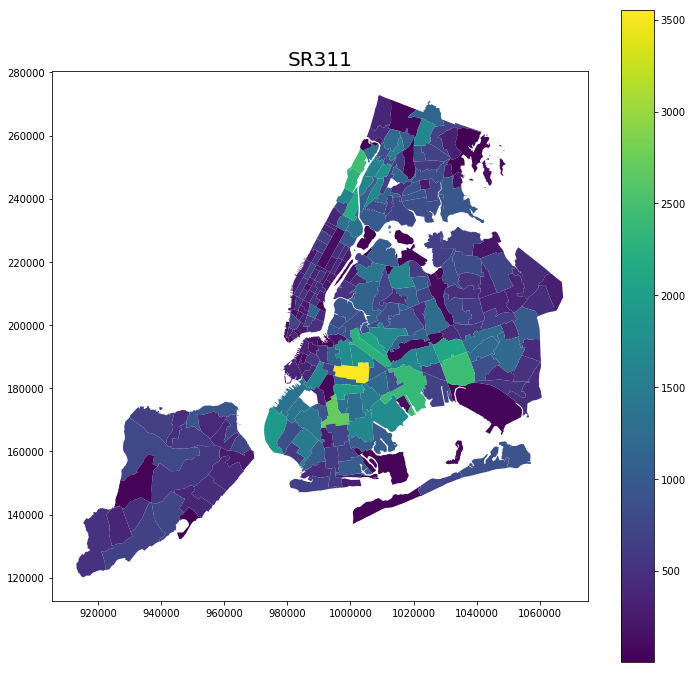

In [26]:
#heatMap for sr311
f, ax = plt.subplots(1, figsize=(12,12))
ax.set_title("SR311", fontsize=20)
tzs.plot(axes=ax, column='sr311', legend=True)

In [27]:
#Clean 0 from population data
PopDf = tzs
PopDf['Population'] = PopDf['Population'].replace(0, np.nan)
testPopDf = PopDf.dropna(axis=0, subset=['Population'])

In [28]:
testPopDf.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,Population,taxi,subway,citibike,twitter,mobile,sr311
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.769506663 256767.6975403726,...",32450.0,31960.0,225527.5,0.0,480.0,109300.0,700.0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.4667968601 203714.0759887695,...",27571.0,178515.0,0.0,31545.0,85.0,179644.0,399.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.3104932606 144283.335850656, ...",26482.0,3667.0,0.0,0.0,40.0,56271.0,490.0
5,6,0.150491,0.000606,Arrochar/Fort Wadsworth,6,Staten Island,"POLYGON ((966568.7466657609 158679.854687795, ...",15896.0,7456.0,0.0,0.0,88.0,147674.0,255.0
6,7,0.107417,0.000390,Astoria,7,Queens,"POLYGON ((1010804.217962816 218919.6406951398,...",77252.0,362180.0,3336898.0,0.0,2294.0,508255.0,1389.0


In [29]:
tzs['PopulationLog'] = np.log(testPopDf.Population)

In [30]:
tempLogDf= tzs.dropna(axis=0, subset=['PopulationLog'])

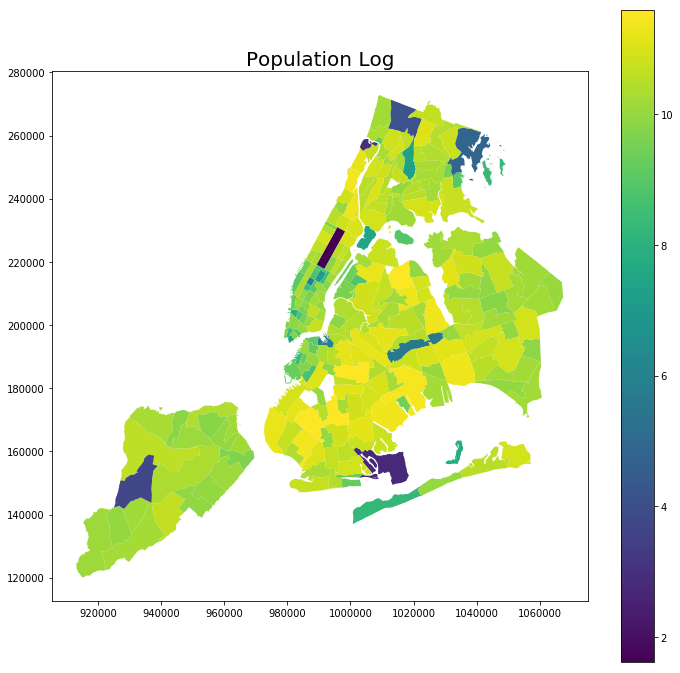

In [31]:
#heatMap for Population Log
f, ax = plt.subplots(1, figsize=(12,12))
ax.set_title("Population Log", fontsize=20)
tempLogDf.plot(axes=ax, column='PopulationLog', legend=True)

In [32]:
tzs.taxi.describe()

count    2.550000e+02
mean     1.685760e+05
std      2.270958e+05
min      6.000000e+00
25%      2.748450e+04
50%      5.948400e+04
75%      2.199800e+05
max      1.117220e+06
Name: taxi, dtype: float64

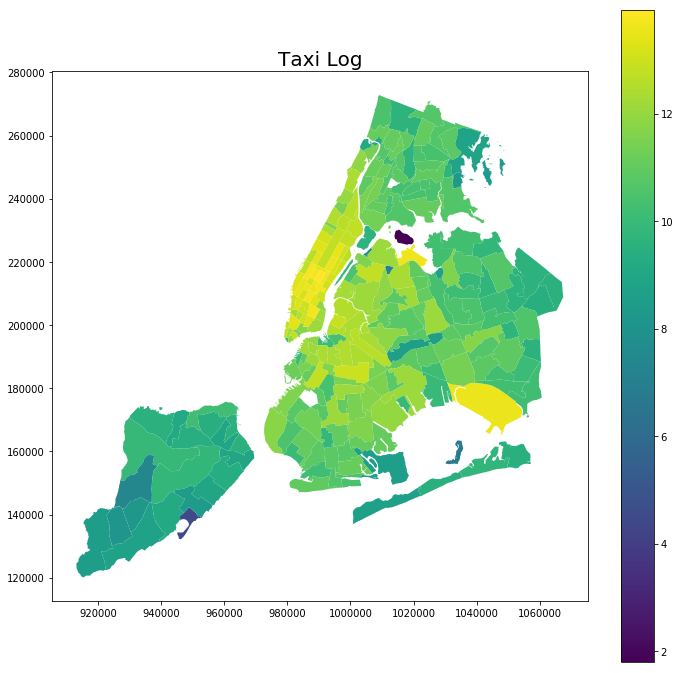

In [33]:
#heatMap for taxi Log
tzs['taxiLog']=np.log(tzs.taxi)
f, ax = plt.subplots(1, figsize=(12,12))
ax.set_title("Taxi Log", fontsize=20)
tzs.plot(axes=ax, column='taxiLog', legend=True)

In [34]:
tzs.subway.describe()

count    2.550000e+02
mean     1.905833e+06
std      4.037362e+06
min      0.000000e+00
25%      0.000000e+00
50%      4.643160e+05
75%      1.987491e+06
max      3.404941e+07
Name: subway, dtype: float64

In [35]:
#Clean 0 from subway data
SubwayDf = tzs
SubwayDf['subway'] = SubwayDf['subway'].replace(0, np.nan)
SubwayDf = SubwayDf.dropna(axis=0, subset=['subway'])
tzs['subwayLog']= np.log(SubwayDf.subway)
tempDf= tzs.dropna(axis=0, subset=['subwayLog'])
tempDf.head()



,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,Population,taxi,subway,citibike,twitter,mobile,sr311,PopulationLog,taxiLog,subwayLog
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.769506663 256767.6975403726,...",32450.0,31960.0,225527.5,0.0,480.0,109300.0,700.0,10.387456,10.372240,12.326197
6,7,0.107417,0.000390,Astoria,7,Queens,"POLYGON ((1010804.217962816 218919.6406951398,...",77252.0,362180.0,3336898.0,0.0,2294.0,508255.0,1389.0,11.254828,12.799897,15.020552
10,11,0.079211,0.000265,Bath Beach,11,Brooklyn,"POLYGON ((983945.0764576197 158978.1743570715,...",33163.0,22630.0,307178.5,0.0,44.0,241014.0,605.0,10.409190,10.027032,12.635184
13,14,0.175214,0.001382,Bay Ridge,14,Brooklyn,"POLYGON ((974794.2377850115 174019.1569889635,...",79134.0,128208.0,2017773.0,0.0,744.0,570900.0,1909.0,11.278898,11.761409,14.517505
16,17,0.093523,0.000323,Bedford,17,Brooklyn,"POLYGON ((1000036.903658479 194829.4335601628,...",75318.0,262720.0,1688664.0,30974.0,2624.0,311910.0,1735.0,11.229474,12.478844,14.339448


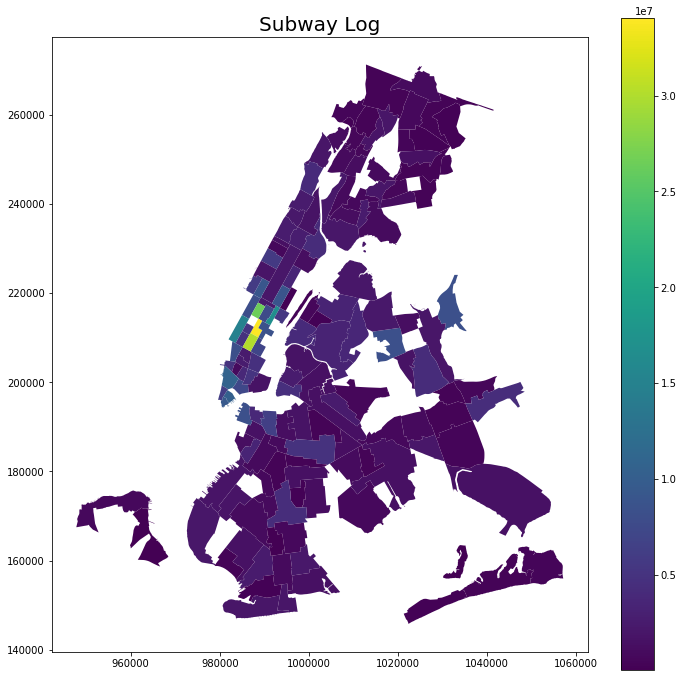

In [36]:
#heatMap for taxi Log
f, ax = plt.subplots(1, figsize=(12,12))
ax.set_title("Subway Log", fontsize=20)
tempDf.plot(axes=ax, column='subway', legend=True)

In [37]:
tzs.citibike.describe()

count       255.000000
mean      13576.972549
std       27690.231039
min           0.000000
25%           0.000000
50%           0.000000
75%       13648.500000
max      156378.000000
Name: citibike, dtype: float64

In [38]:
citibikeDf = tzs
citibikeDf['citibike'] = SubwayDf['citibike'].replace(0, np.nan)
citibikeDf = citibikeDf.dropna(axis=0, subset=['citibike'])
tzs['citibikeLog']= np.log(citibikeDf.citibike)
tempDf= tzs.dropna(axis=0, subset=['citibikeLog'])
tempDf.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,Population,taxi,subway,citibike,twitter,mobile,sr311,PopulationLog,taxiLog,subwayLog,citibikeLog
16,17,0.093523,0.000323,Bedford,17,Brooklyn,"POLYGON ((1000036.903658479 194829.4335601628,...",75318.0,262720.0,1688664.0,30974.0,2624.0,311910.0,1735.0,11.229474,12.478844,14.339448,10.340903
23,24,0.047000,0.000061,Bloomingdale,24,Manhattan,"POLYGON ((995453.1139255464 230274.2667761594,...",16699.0,100407.0,1441439.0,13482.0,458.0,81024.0,380.0,9.723104,11.516987,14.181152,9.509111
24,25,0.047146,0.000124,Boerum Hill,25,Brooklyn,"POLYGON ((989365.8368552327 190351.5051010698,...",23149.0,192906.0,1598708.0,32071.0,134.0,165714.0,565.0,10.049707,12.169958,14.284706,10.375707
32,33,0.053270,0.000147,Brooklyn Heights,33,Brooklyn,"POLYGON ((985305.7563099563 195535.7550296187,...",24140.0,211080.0,8388910.5,39943.0,234.0,189809.0,363.0,10.091625,12.259992,15.942421,10.595209
36,37,0.142810,0.000452,Bushwick South,37,Brooklyn,"POLYGON ((1002791.711024463 196025.0809525102,...",75003.0,304170.0,1356872.0,6681.0,2187.0,494820.0,2270.0,11.225283,12.625342,14.120693,8.807023


In [39]:
tempDf.citibike.describe()

count        61.000000
mean      46096.278689
std       35838.597493
min         845.000000
25%       21380.000000
50%       41494.000000
75%       55207.000000
max      156378.000000
Name: citibike, dtype: float64

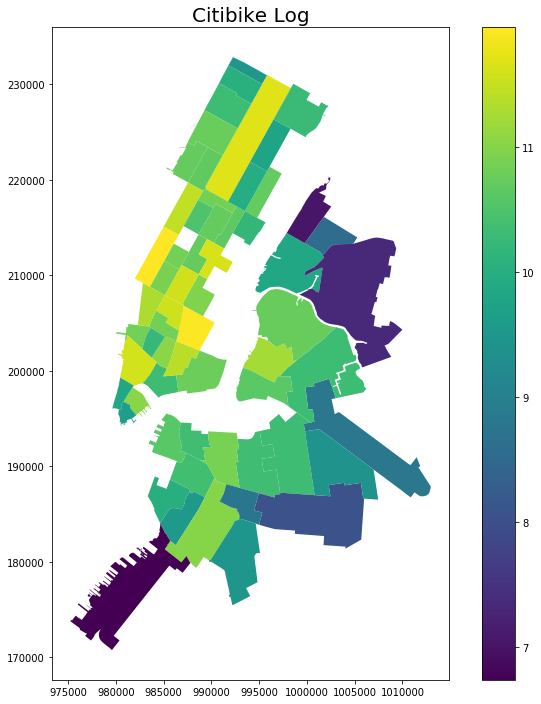

In [40]:
#heatMap for citibike Log
f, ax = plt.subplots(1, figsize=(12,12))
ax.set_title("Citibike Log", fontsize=20)
tempDf.plot(axes=ax, column='citibikeLog', legend=True)

In [41]:
tzs.twitter.describe()


count      255.000000
mean       737.254902
std       1391.522633
min          1.000000
25%        132.500000
50%        274.000000
75%        708.000000
max      11945.000000
Name: twitter, dtype: float64

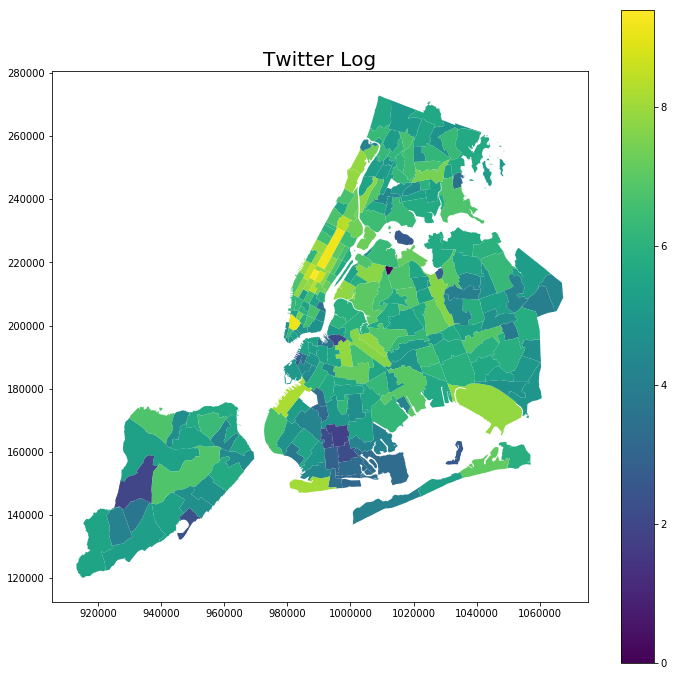

In [42]:
#heatMap for twitter Log
tzs['twitterLog']=np.log(tzs.twitter)
f, ax = plt.subplots(1, figsize=(12,12))
ax.set_title("Twitter Log", fontsize=20)
tzs.plot(axes=ax, column='twitterLog', legend=True)

In [43]:
tzs.mobile.describe()

count    2.550000e+02
mean     3.194494e+05
std      2.486985e+05
min      1.076000e+03
25%      1.590650e+05
50%      2.557000e+05
75%      4.414060e+05
max      2.255069e+06
Name: mobile, dtype: float64

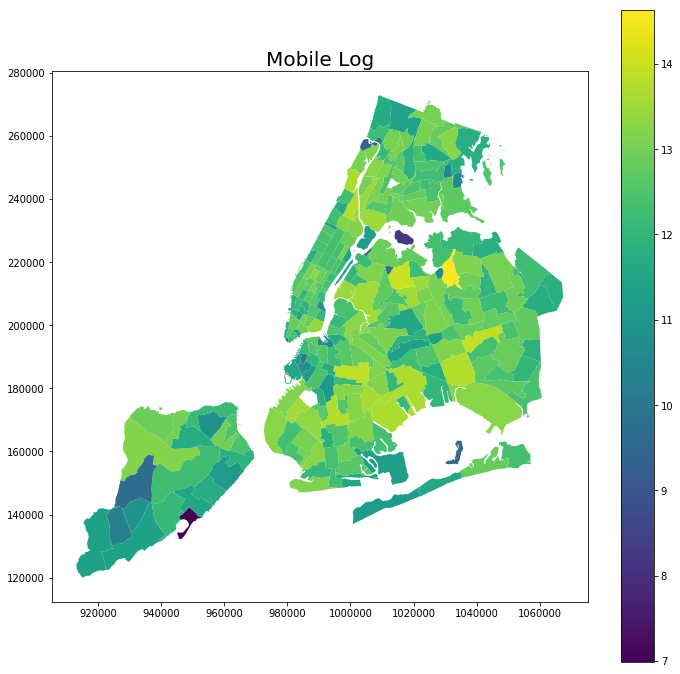

In [44]:
#heatMap for Mobile Log
tzs['mobileLog']=np.log(tzs.mobile)
f, ax = plt.subplots(1, figsize=(12,12))
ax.set_title("Mobile Log", fontsize=20)
tzs.plot(axes=ax, column='mobileLog', legend=True)

In [45]:
tzs.sr311.describe()

count     255.000000
mean      723.894118
std       573.770415
min         1.000000
25%       336.500000
50%       598.000000
75%       977.500000
max      3553.000000
Name: sr311, dtype: float64

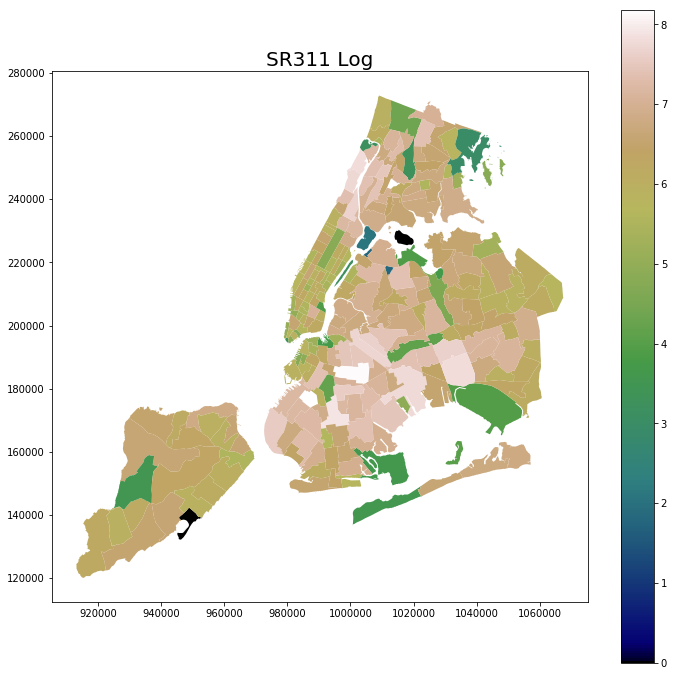

In [46]:
#heatMap for sr311 Log
tzs['sr311Log']=np.log(tzs.sr311)
f, ax = plt.subplots(1, figsize=(12,12))
ax.set_title("SR311 Log", fontsize=20)
tzs.plot(axes=ax, column='sr311Log', legend=True,cmap='gist_earth') 